## Build a Convolutional Neural Network (CNN) that can correctly classify images from the CIFAR-10 dataset into one of 10 categories

In [ ]:
# Import Required Libraries

# Core numerical and plotting libraries
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow and Keras modules
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    Flatten, Dense, Dropout
)
from tensorflow.keras.utils import to_categorical


In [ ]:

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [ ]:
# Data Exploration
# Check dataset shape
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


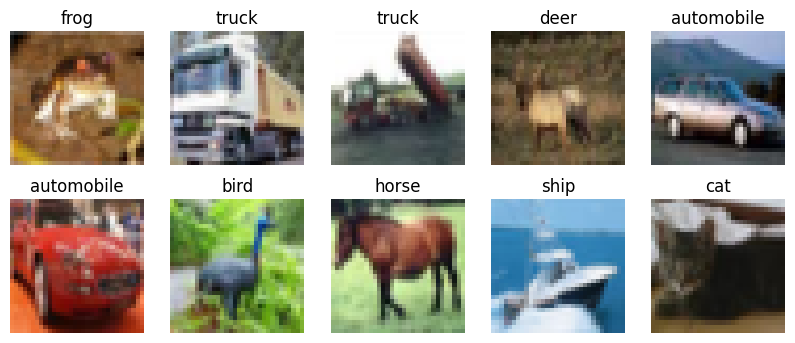

In [ ]:
# Visualize Sample Images- Ensures data is loaded correctly-Helps understand image complexity and noise

# Class labels
class_names = [
    'airplane','automobile','bird','cat','deer',
    'dog','frog','horse','ship','truck'
]

# Display first 10 images
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


In [ ]:
#. Data Preprocessing
# Normalize pixel values from [0,255] → [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
#One-Hot Encode Labels
# Convert class labels to one-hot vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
# Build CNN Model
# Initialize Sequential model
model = Sequential()

# -------------------------
# Convolution Block 1
# -------------------------
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3,3),
        activation='relu',
        input_shape=(32,32,3)
    )
)
model.add(MaxPooling2D(pool_size=(2,2)))

# -------------------------
# Convolution Block 2
# -------------------------
model.add(
    Conv2D(
        filters=64,
        kernel_size=(3,3),
        activation='relu'
    )
)
model.add(MaxPooling2D(pool_size=(2,2)))

# -------------------------
# Fully Connected Layers
# -------------------------
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Reduce overfitting

# Output Layer
model.add(Dense(10, activation='softmax'))


In [ ]:
# Compile the Model- Adam → adaptive, fast convergence, Categorical Crossentropy → multi-class classification
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Model
# Epoch → one full pass through dataset(FP+BP),Batch size → number of samples per update,Validation data → monitor overfitting
history = model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3012 - loss: 1.8952 - val_accuracy: 0.5167 - val_loss: 1.3611
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4805 - loss: 1.4373 - val_accuracy: 0.5728 - val_loss: 1.1923
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5397 - loss: 1.2935 - val_accuracy: 0.6147 - val_loss: 1.1088
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5749 - loss: 1.1931 - val_accuracy: 0.6505 - val_loss: 1.0097
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6024 - loss: 1.1258 - val_accuracy: 0.6561 - val_loss: 1.0013
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6218 - loss: 1.0740 - val_accuracy: 0.6688 - val_loss: 0.9618
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6378 - loss: 1.0248 - val_accuracy: 0.6648 - val_loss: 0.9519
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6559 - loss: 0.9775 - val_acc

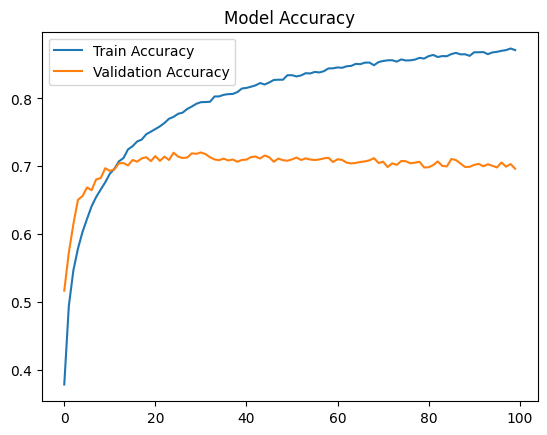

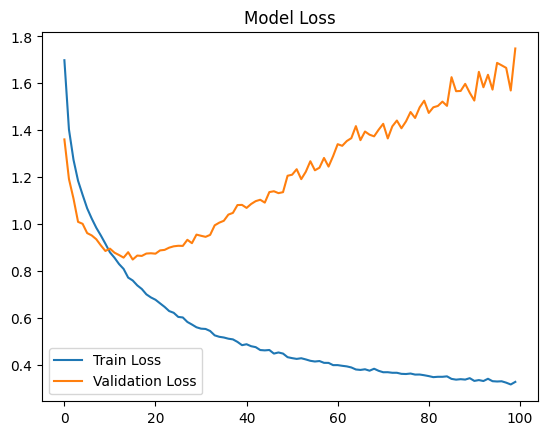

In [ ]:
# Plot Training Performance
# Training accuracy should increase, Validation accuracy should follow closely,Large gap → overfitting

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


In [ ]:
# Model Evaluation

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6993 - loss: 1.7088
Test Accuracy: 0.696399986743927


In [ ]:
# Make Predictions
# Predict classes
predictions = model.predict(x_test)

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


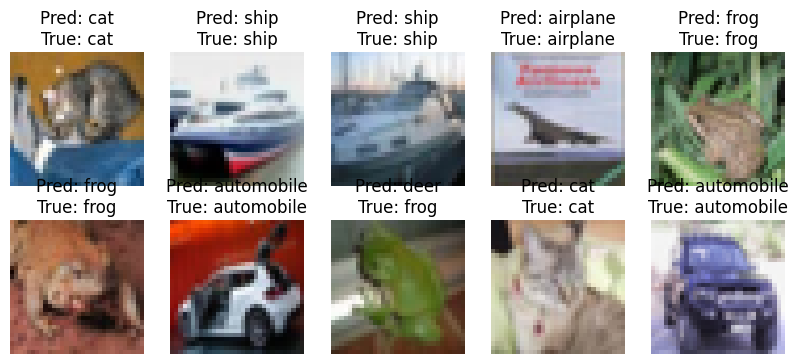

In [ ]:
#Visualize Predictions

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.title(
        f"Pred: {class_names[predicted_classes[i]]}\n"
        f"True: {class_names[true_classes[i]]}"
    )
    plt.axis('off')
plt.show()
